# Student Guide to Outlier Detection Algorithms

## 🎯 What Is Outlier Detection Really About?

Imagine you're a quality inspector at a chocolate factory. Most chocolates look similar - same size, color, and shape. But occasionally, you spot one that's completely different: maybe it's twice as big, bright green, or shaped like a star. These unusual chocolates are **outliers** - they don't fit the normal pattern.

In data science, outlier detection is about finding data points that are significantly different from the majority. But here's the challenge: **different algorithms have different definitions of "unusual"!**

---

## 🔍 The Fundamental Approaches to Finding Outliers

### 🎭 **Four Main Philosophies**

Different outlier detection algorithms are based on different core ideas about what makes something "unusual":

1. **📊 Statistical Approach**: "How far from the average?"
2. **🌐 Distance-Based Approach**: "How far from neighbors?"  
3. **🤖 Model-Based Approach**: "How hard to predict/describe?"
4. **🏘️ Density-Based Approach**: "How isolated/sparse is the neighborhood?"

Let's explore each philosophy and the algorithms that implement them!

---

## 📊 Part 1: Statistical Outlier Detection - "The Statistician's Toolkit"

These methods assume your data follows some statistical pattern and flag points that deviate too much from this pattern.

### 🎯 **Z-Score Method: The Classic Bell Curve Test**

**Core Idea**: "How many standard deviations away from the mean?"

**The Intuition**: 
- In a normal distribution, ~99.7% of data falls within 3 standard deviations
- If something is beyond 3σ, it's statistically very unlikely
- Therefore, it's probably an outlier

**Mathematical Foundation**:
$$Z = \frac{x - \mu}{\sigma}$$

**Think of it like this**: 
- **Z = 0**: Exactly average
- **Z = 1**: One standard deviation above average (fairly normal)
- **Z = 3**: Three standard deviations above (very unusual!)
- **Z = 5**: Extremely rare under normal distribution

**Real Example - Student Heights**:
- Average height: 170cm, Standard deviation: 10cm
- Student A: 180cm → Z = (180-170)/10 = 1.0 (normal)
- Student B: 210cm → Z = (210-170)/10 = 4.0 (outlier!)

**Strengths**: Simple, interpretable, fast
**Weaknesses**: Assumes normal distribution, sensitive to other outliers

### 🛡️ **Modified Z-Score: The Robust Version**

**Core Idea**: "Use median and MAD instead of mean and standard deviation"

**Why Better**: The mean and standard deviation can be "pulled" by outliers, making other outliers harder to detect. Median and MAD (Median Absolute Deviation) are robust - they don't get fooled by existing outliers.

**Mathematical Foundation**:
$$M_i = \frac{0.6745(x_i - \text{median})}{\text{MAD}}$$

where $\text{MAD} = \text{median}(|x_i - \text{median}|)$

**Real Example - Income Data**:
- Dataset: [$30K, $32K, $35K, $38K, $1M]
- **Regular Z-score**: Mean = $227K (pulled up by millionaire!), so $1M doesn't seem extreme
- **Modified Z-score**: Median = $35K (unaffected), so $1M clearly stands out

**The Magic Number 0.6745**: This makes MAD comparable to standard deviation for normal data.

### 📦 **Interquartile Range (IQR) Method: The Box Plot Rule**

**Core Idea**: "Anything beyond the box plot whiskers is unusual"

**The Process**:
1. Find Q1 (25th percentile) and Q3 (75th percentile)
2. Calculate IQR = Q3 - Q1
3. Define outliers as anything below Q1 - 1.5×IQR or above Q3 + 1.5×IQR

**Think of it like this**: 
- The "box" contains the middle 50% of your data (normal range)
- The "whiskers" extend 1.5 box-lengths beyond the box
- Anything outside the whiskers is an outlier

**Real Example - Test Scores**:
- Scores: [65, 70, 75, 80, 85, 90, 95, 20, 100]
- Q1 = 70, Q3 = 90, IQR = 20
- Lower fence: 70 - 1.5×20 = 40
- Upper fence: 90 + 1.5×20 = 120
- Outlier: Score of 20 (below 40)

**Why 1.5?**: Empirical rule that works well in practice - catches obvious outliers without too many false positives.

### 🔄 **PCA Reconstruction Error: The Compression Test**

**Core Idea**: "Normal data follows main patterns, outliers don't"

**The Intuition**:
1. **Find the main patterns** in your data using Principal Component Analysis
2. **Compress data** to just these main patterns, then **reconstruct** it
3. **Measure reconstruction error**: Normal points reconstruct well, outliers don't

**Think of it like this**: 
Imagine describing people using only 2 features: "height" and "build." Most people can be described well this way:
- "Tall and thin" reconstructs well → Normal person
- "Short and heavy" reconstructs well → Normal person  
- "Someone with green hair and 12 fingers" → Can't reconstruct well with just height/build → Outlier!

**Mathematical Foundation**:
1. Apply PCA: $\mathbf{Z} = \mathbf{X}\mathbf{W}$ (compress to k components)
2. Reconstruct: $\hat{\mathbf{X}} = \mathbf{Z}\mathbf{W}^T$ 
3. Error: $e_i = ||\mathbf{x}_i - \hat{\mathbf{x}}_i||^2$

**Real Example - Customer Behavior**:
- Main patterns: Weekend shoppers, weekday shoppers, holiday shoppers
- Normal customer: Fits one of these patterns → Low reconstruction error
- Outlier: Shops only at 3 AM, buys 100 items → Doesn't fit any pattern → High error

---

## 🌐 Part 2: Distance-Based Detection - "The Neighborhood Analysis"

These methods ask: "How far is this point from its neighbors?"

### 🏠 **K-Nearest Neighbors (KNN) Distance**

**Core Idea**: "How far am I from my k closest neighbors?"

**The Intuition**: 
- **Normal points**: Live in dense neighborhoods with many nearby neighbors
- **Outliers**: Live in sparse areas, far from their nearest neighbors

**The Process**:
1. For each point, find its k nearest neighbors
2. Calculate average distance to these neighbors  
3. Points with large average distances are outliers

**Real-World Analogy**: 
In a normal neighborhood, houses are roughly the same distance from each other. But if you live on a remote farm, your "nearest neighbors" are much farther away - you're a geographic outlier!

**Mathematical Foundation**:
$$\text{KNN-distance}(x_i) = \frac{1}{k}\sum_{j=1}^k d(x_i, x_{j}^{(nn)})$$

where $x_{j}^{(nn)}$ are the k nearest neighbors of $x_i$.

**Parameter Choice**: 
- **Small k** (3-5): Sensitive to local structure, good for clustered data
- **Large k** (20-50): More stable, good for uniform data
- **Rule of thumb**: k ≈ √n or k ≈ log(n)

**Example - Social Network Analysis**:
- **Normal user**: Connected to many mutual friends → Small average distance
- **Spam account**: Few connections, mostly to other spam accounts → Large distance to normal users

### 🎯 **DBSCAN: Density-Based Spatial Clustering**

**Core Idea**: "Can I find enough friends nearby? If not, I'm an outlier."

**The Philosophy**: 
- **Dense regions**: Core of clusters, where you can find many neighbors within distance ε
- **Sparse regions**: Outliers, where you can't find enough neighbors

**The Process**:
1. **Choose parameters**: ε (neighborhood radius) and MinPts (minimum neighbors needed)
2. **For each point**: Count neighbors within distance ε
3. **Classification**:
   - **Core point**: ≥ MinPts neighbors → Part of a cluster
   - **Border point**: < MinPts neighbors but near a core point → Edge of cluster  
   - **Noise point**: < MinPts neighbors and not near core → **Outlier**

**Real-World Analogy**: 
At a party, most people form conversation groups (clusters). Someone standing completely alone with no one nearby is an outlier. Someone near a group but not really part of it is a border point.

**Mathematical Foundation**:
- Neighborhood: $N_ε(x) = \{y | d(x,y) ≤ ε\}$
- Core point: $|N_ε(x)| ≥ \text{MinPts}$
- Outlier: Not core, not border

**Parameter Selection**:
- **ε**: Use k-distance plot (plot distance to k-th neighbor, look for "elbow")
- **MinPts**: Often set to 2×dimensions, or use domain knowledge

### 📏 **Mahalanobis Distance: The Correlation-Aware Distance**

**Core Idea**: "Distance that accounts for how features relate to each other"

**The Problem with Euclidean Distance**: 
Regular distance treats all features equally and ignores correlations. But what if features are naturally correlated?

**Example**: Height vs. Weight
- Person A: 6'5" tall, 150 lbs → Very unusual (tall but very light)
- Person B: 5'5" tall, 200 lbs → Somewhat unusual (average height, heavy)
- **Euclidean distance** might say B is more unusual
- **Mahalanobis distance** correctly identifies A as more unusual

**The Intuition**: 
Mahalanobis distance "stretches" the space to account for:
1. **Different scales**: Income in dollars vs. age in years
2. **Correlations**: Tall people usually weigh more
3. **Different variabilities**: Some features vary more than others

**Mathematical Foundation**:
$$d_M(x, \mu) = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)}$$

where $\Sigma$ is the covariance matrix capturing correlations.

**Robust Version**: Use robust estimators (Minimum Covariance Determinant) instead of sample mean/covariance to avoid contamination by outliers.

---

## 🤖 Part 3: Model-Based Detection - "The Machine Learning Approach"

These methods build models of "normal" behavior and flag anything that doesn't fit the model.

### 🌲 **Isolation Forest: The Random Tree Hunter**

**Core Idea**: "How easy is it to isolate this point using random splits?"

**The Beautiful Insight**: 
- **Normal points**: Surrounded by many similar points → Need many splits to isolate
- **Outliers**: Few similar points nearby → Easy to isolate with few splits

**The Process**:
1. **Build random binary trees** with random split points
2. **For each point**: Count how many splits needed to isolate it
3. **Outliers**: Require fewer splits (shorter path length)

**Real-World Analogy**: 
Playing "20 Questions" to identify a person:
- **Normal person**: "Are they tall? Are they male? Do they wear glasses?" → Takes many questions
- **Outlier**: "Do they have blue hair?" → "Yes!" → Isolated in one question!

**Mathematical Foundation**:
- Path length for point x: $h(x)$
- Average path length over all trees: $E[h(x)]$ 
- Anomaly score: $s(x) = 2^{-\frac{E[h(x)]}{c(n)}}$

where $c(n)$ is the average path length of unsuccessful search in BST.

**Why It Works**:
- **Random splits**: Don't need to know what "normal" looks like
- **Ensemble**: Multiple trees reduce variance
- **Subsampling**: Works with small samples, scales well

**Example - Network Security**:
- **Normal traffic**: Mixed protocols, ports, packet sizes → Hard to isolate
- **Attack traffic**: Unusual port, strange packet pattern → Easy to isolate

### 👥 **Local Outlier Factor (LOF): The Social Comparison**

**Core Idea**: "Am I as popular (dense) as my neighbors?"

**The Sophisticated Insight**: 
Being in a sparse area isn't enough to be an outlier - what if ALL your neighbors are also in sparse areas? LOF compares your local density to your neighbors' local densities.

**The Process**:
1. **For each point**: Calculate local density (how tightly packed is my neighborhood?)
2. **For each neighbor**: Calculate their local density
3. **Compare**: Am I much less dense than my neighbors?
4. **LOF > 1**: I'm less dense than my neighbors → Outlier
5. **LOF ≈ 1**: Similar density to neighbors → Normal

**Real-World Analogy**: 
At a concert with different sections:
- **Normal**: You're in the "nosebleed" section, but so are your neighbors → LOF ≈ 1
- **Outlier**: You're standing alone in an empty section while your "nearest neighbors" are in a packed section → LOF >> 1

**Mathematical Foundation**:
$$\text{LOF}(x) = \frac{\sum_{y \in N_k(x)} \frac{\text{lrd}(y)}{\text{lrd}(x)}}{|N_k(x)|}$$

where $\text{lrd}(x)$ is local reachability density.

**Key Insight**: LOF adapts to local density variations - what's normal in one region might be outlying in another.

### 🎯 **One-Class SVM: The Boundary Drawer**

**Core Idea**: "Draw a boundary around normal data; anything outside is an outlier"

**The Approach**:
1. **Learn a boundary** that encompasses most of the training data
2. **Anything outside** this boundary is classified as an outlier
3. **Use kernel tricks** to handle complex, non-linear boundaries

**Think of it like this**: 
Imagine drawing a fence around a flock of sheep. The fence should:
- **Include most sheep** (low false positive rate)
- **Be as tight as possible** (don't include too much empty space)
- **Handle complex shapes** (sheep might cluster in weird formations)

**Mathematical Foundation**:
- Map data to high-dimensional space: $\phi(x)$
- Find hyperplane: $w^T\phi(x) + b = 0$
- Outlier if: $w^T\phi(x) + b < 0$

**Kernel Types**:
- **Linear**: Simple boundaries, interpretable
- **RBF (Gaussian)**: Complex, curved boundaries
- **Polynomial**: Moderate complexity

**Parameter ν**: Controls trade-off between including all normal data vs. tight boundary

---

## 🏘️ Part 4: Density-Based Advanced Methods

These are sophisticated methods that analyze the distribution patterns in your data.

### 📊 **ECOD: Empirical Cumulative Distribution Outliers**

**Core Idea**: "How extreme am I in ANY dimension?"

**The Brilliant Insight**: 
Convert each feature to its percentile rank, then find points that are extreme (near 0% or 100%) in any dimension.

**The Process**:
1. **For each feature**: Convert values to ranks (percentiles 0-1)
2. **For each point**: Find how close to extreme (0 or 1) in each dimension
3. **Take minimum**: If extreme in ANY dimension → outlier

**Mathematical Foundation**:
- Convert to ranks: $R_j(x) = \frac{\text{rank of } x \text{ in feature } j}{n}$
- Tail probability: $\tau_j(x) = \min(R_j(x), 1-R_j(x))$
- ECOD score: $\text{ECOD}(x) = \min_j \tau_j(x)$

**Example - Customer Analysis**:
- **Customer A**: Average in all dimensions → ECOD score ≈ 0.5 (normal)
- **Customer B**: 99th percentile in spending → ECOD score ≈ 0.01 (outlier!)

**Why It Works**:
- **Distribution-free**: Works with any data distribution
- **Multivariate**: Catches outliers in any dimension
- **Fast**: Just ranking and minimum operations

### 🎭 **COPOD: Copula-Based Outlier Detection**

**Core Idea**: "If features were independent, how unlikely would this combination be?"

**The Statistical Foundation**: 
A copula describes how features depend on each other. COPOD asks: "What if features were independent? How surprising would this data point be?"

**The Process**:
1. **Convert to marginal ranks**: Each feature becomes 0-1 percentile
2. **Assume independence**: Under independence, P(X₁,X₂,...,Xₙ) = P(X₁)×P(X₂)×...×P(Xₙ)
3. **Calculate joint probability**: Product of marginal probabilities
4. **Low probability** → Outlier

**Mathematical Foundation**:
- Marginal CDFs: $u_j = F_j(x_j)$ (percentile in feature j)
- Independence assumption: $C(u_1,...,u_d) = u_1 \times u_2 \times ... \times u_d$
- COPOD score: $-\log(\prod_j u_j)$

**Example - Student Performance**:
- **Normal student**: 60th percentile math, 65th percentile reading → Product = 0.6×0.65 = 0.39
- **Outlier student**: 99th percentile math, 5th percentile reading → Product = 0.99×0.05 = 0.05 (very unlikely combination!)

**Why It's Clever**: 
- **Captures unusual combinations** even when individual features aren't extreme
- **Model-free**: No assumptions about specific distributions
- **Handles dependencies**: Detects violations of independence

### 📊 **HBOS: Histogram-Based Outlier Score**

**Core Idea**: "How rarely do we see values like this in each feature?"

**The Approach**:
1. **For each feature**: Build a histogram (count frequency of different value ranges)
2. **For each point**: Find which histogram bin it falls into
3. **Score by rarity**: Points in rare bins get high outlier scores
4. **Combine features**: Sum log-probabilities across all features

**Mathematical Foundation**:
- Histogram density: $p_j(x)$ for feature j
- Independence assumption: $p(x_1,...,x_d) = \prod_j p_j(x_j)$
- HBOS score: $\sum_j -\log(p_j(x_j))$

**Think of it like this**: 
Each feature votes on how unusual a point is:
- **Common values**: "I see this all the time" → Low vote
- **Rare values**: "I've never seen this before!" → High vote
- **Final score**: Sum of all votes

**Example - E-commerce**:
- **Feature 1 (Purchase Time)**: 3 AM purchases are rare → High score
- **Feature 2 (Amount)**: $50 purchases are common → Low score  
- **Feature 3 (Category)**: Electronics purchases are common → Low score
- **Total**: High score due to unusual time, despite normal amount/category

**Advantages**:
- **Very fast**: Just histogram lookups
- **Interpretable**: Can see which features contribute to outlier score
- **No distance calculations**: Scales well to high dimensions

---

## 🎵 Part 5: Ensemble Methods - "The Wisdom of Crowds"

### 🤝 **Why Ensemble Methods Work**

**The Core Principle**: Different algorithms have different strengths and blind spots. By combining them, we get more robust and reliable outlier detection.

**Think of it like this**: 
Medical diagnosis with multiple specialists:
- **Cardiologist**: Excellent at heart problems, might miss neurological issues
- **Neurologist**: Great with brain/nerve issues, might miss heart problems  
- **General practitioner**: Good overall view, might miss specialized conditions
- **Team diagnosis**: Combines all perspectives for better accuracy

### 🎯 **Weighted Voting Strategy**

**The Insight**: Not all algorithms are equally reliable. Some have been proven more effective in research.

**Weight Assignment Based on**:
- **Research validation**: How well does this method perform across many datasets?
- **Theoretical soundness**: Is the mathematical foundation solid?
- **Robustness**: How sensitive to parameter choices and data quality?

**Example Weights**:
- **ECOD**: Weight 1.3 (SOTA method, proven effective)
- **Isolation Forest**: Weight 1.0 (Well-established, reliable)
- **LOF**: Weight 1.1 (Good for local patterns)
- **Z-score**: Weight 0.6 (Simple but can be fooled)

### 📊 **Confidence Scoring**

**The Question**: How confident are we in each outlier detection?

**The Approach**: 
- **High confidence**: All methods agree → "Everyone says this is an outlier!"
- **Low confidence**: Methods disagree → "Some say outlier, some say normal..."

**Mathematical Foundation**:
$$\text{Confidence}(x) = 1 - \frac{\text{std}(\text{votes for } x)}{\text{max possible std}}$$

**Usage**: 
- **High confidence outliers**: Investigate immediately
- **Low confidence outliers**: Might be edge cases, investigate if resources allow

---

## 🎯 Part 6: Choosing the Right Algorithm

### 📋 **Algorithm Selection Guide**

**Based on Data Characteristics**:

#### **🔢 Data Size**
- **Small (< 1,000)**: Any method works, prefer interpretable ones (LOF, HBOS)
- **Medium (1,000-10,000)**: Most methods, avoid O(n²) algorithms  
- **Large (> 10,000)**: Fast methods only (Isolation Forest, HBOS, ECOD)

#### **📊 Dimensionality**
- **Low (< 10 features)**: Distance-based methods work well (KNN, LOF, Mahalanobis)
- **Medium (10-50 features)**: Model-based methods (Isolation Forest, One-Class SVM)
- **High (> 50 features)**: Distribution-based methods (ECOD, COPOD, HBOS)

#### **🎭 Data Distribution**
- **Normal/Gaussian**: Statistical methods (Z-score, Mahalanobis)
- **Skewed/Heavy-tailed**: Robust methods (Modified Z-score, ECOD)
- **Unknown/Mixed**: Ensemble or distribution-free methods (Isolation Forest, COPOD)

#### **🎯 Outlier Type Expected**
- **Global outliers**: Statistical methods (Z-score, IQR)
- **Local outliers**: Density-based methods (LOF, DBSCAN)
- **Contextual outliers**: Model-based methods (Isolation Forest, One-Class SVM)

### 🏆 **Method Comparison Summary**

| Algorithm | Speed | Accuracy | Interpretability | Robustness | Best For |
|-----------|--------|----------|------------------|------------|----------|
| **Z-Score** | ⚡⚡⚡ | 🎯🎯 | 📖📖📖 | 🛡️ | Normal data, quick screening |
| **IQR** | ⚡⚡⚡ | 🎯🎯 | 📖📖📖 | 🛡️🛡️ | Simple, robust baseline |
| **Isolation Forest** | ⚡⚡ | 🎯🎯🎯 | 📖 | 🛡️🛡️🛡️ | General purpose, large data |
| **LOF** | ⚡ | 🎯🎯🎯 | 📖📖 | 🛡️🛡️ | Local patterns, clusters |
| **ECOD** | ⚡⚡⚡ | 🎯🎯🎯 | 📖📖 | 🛡️🛡️🛡️ | High dimensions, mixed distributions |
| **COPOD** | ⚡⚡ | 🎯🎯🎯 | 📖 | 🛡️🛡️🛡️ | Feature interactions, dependencies |
| **Ensemble** | ⚡ | 🎯🎯🎯🎯 | 📖 | 🛡️🛡️🛡️🛡️ | Maximum reliability |

---

## 💡 Part 7: Common Pitfalls and Misconceptions

### 🚫 **"One Algorithm Fits All" Fallacy**
**Wrong thinking**: "Isolation Forest is the best, always use it!"
**Reality**: Different algorithms excel in different scenarios. The "best" depends on your data and requirements.

### 🚫 **"More Outliers = Better Detection" Fallacy**  
**Wrong thinking**: "Algorithm A found 20% outliers, Algorithm B found 5%, so A is better!"
**Reality**: The "right" number of outliers depends on your domain. In manufacturing, 1% might be normal. In fraud detection, 10% might be expected.

### 🚫 **"Complex = Better" Fallacy**
**Wrong thinking**: "Neural networks and deep learning are always better than simple methods!"
**Reality**: Simple methods often work just as well and are more interpretable. Start simple, add complexity only if needed.

### 🚫 **"Outliers = Errors" Misconception**
**Wrong thinking**: "Outliers are always bad data that should be removed!"
**Reality**: Outliers might be:
- **Errors**: Data entry mistakes, sensor failures
- **Interesting discoveries**: New phenomena, fraud, breakthrough customers
- **Edge cases**: Rare but valid occurrences

### 🚫 **"Parameter-Free Algorithms" Myth**
**Wrong thinking**: "This algorithm has no parameters, so it's easier!"
**Reality**: Every algorithm has implicit assumptions and parameters. "Parameter-free" often means "parameters are hidden from you."

---

## 🎪 Summary: Your Outlier Detection Algorithmic Toolkit

### 🏆 **The Essential Algorithms**

**🥇 For Beginners**: Start with IQR + Isolation Forest + Ensemble
**⚡ For Speed**: ECOD + HBOS + Statistical methods
**🎯 For Accuracy**: LOF + Isolation Forest + COPOD + Ensemble  
**📖 For Interpretability**: Z-score + IQR + HBOS
**🛡️ For Robustness**: Modified Z-score + ECOD + Ensemble

### 🎯 **The Golden Principles**

1. **🎪 Understand your data first** - Different data needs different algorithms
2. **🎵 Ensemble beats individual methods** - Combine multiple perspectives  
3. **⚖️ Balance complexity vs. interpretability** - Simple often wins
4. **🔄 Validate with domain knowledge** - Do the outliers make sense?
5. **📊 Consider the cost of false positives vs. false negatives** - Missing fraud is different from flagging normal customers

### 🚀 **Advanced Insights**

- **Statistical methods**: Fast and interpretable, but assume distributional shapes
- **Distance-based methods**: Intuitive and flexible, but struggle in high dimensions
- **Model-based methods**: Powerful and general, but less interpretable
- **Distribution-based methods**: Handle complex patterns, excellent for high dimensions
- **Ensemble methods**: Most reliable, but computationally expensive

*Remember: Outlier detection is both science and art. The algorithms provide the science, but understanding your domain and validating results provides the art. Always ask "Do these outliers make sense in my business context?" before taking action!* 🎯✨

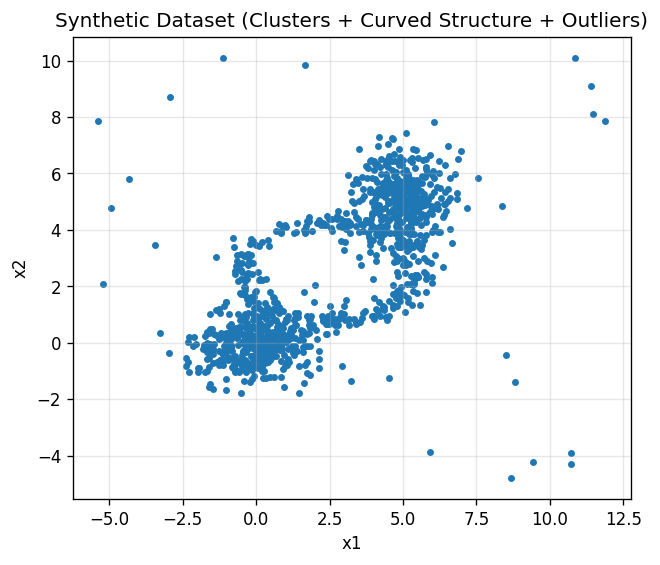

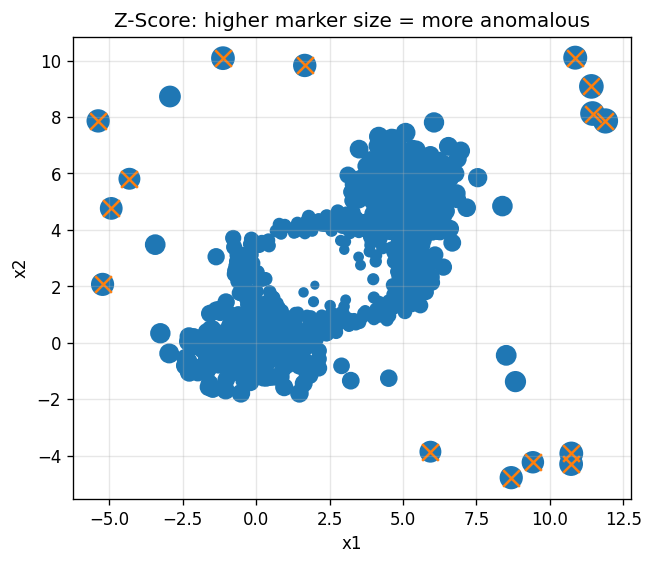

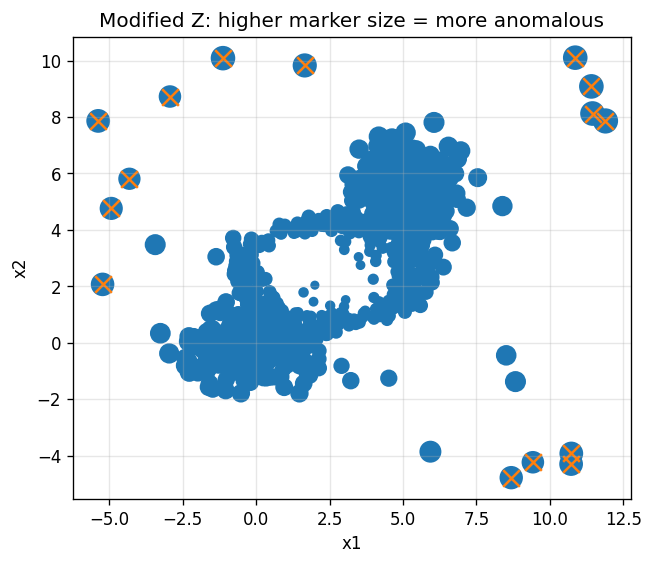

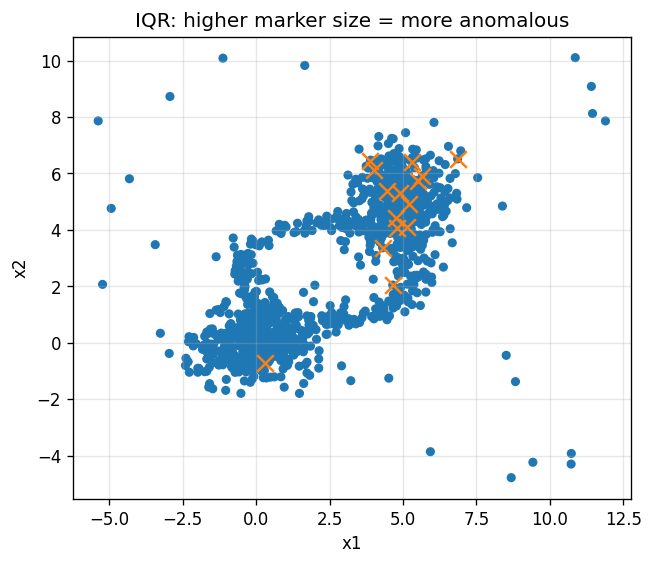

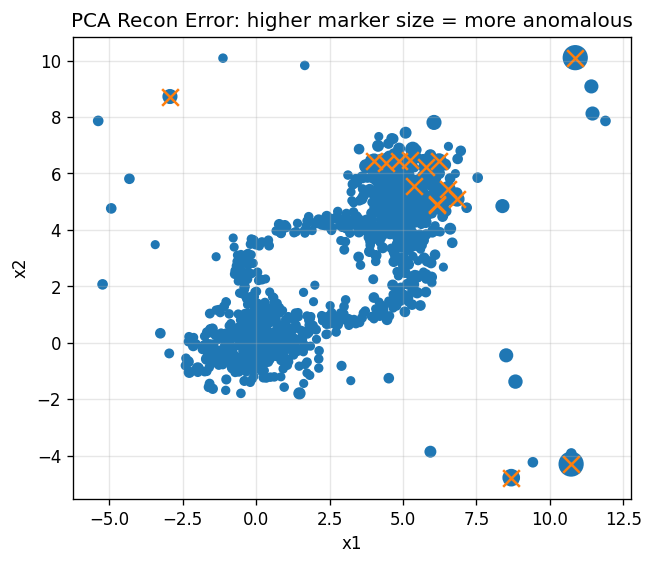

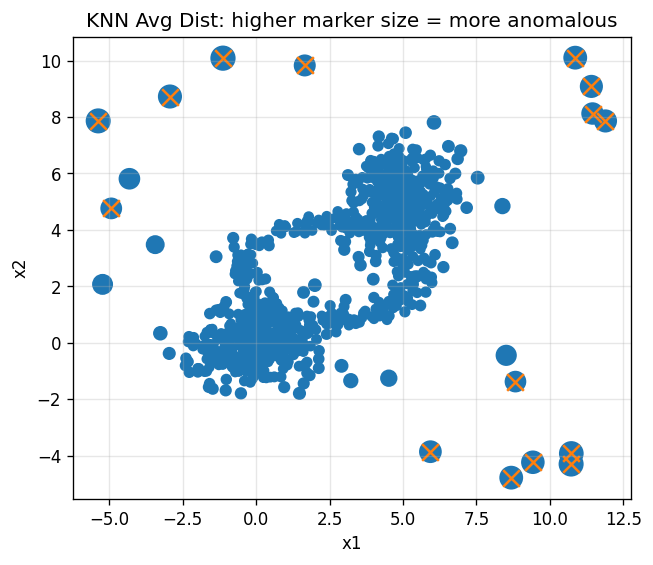

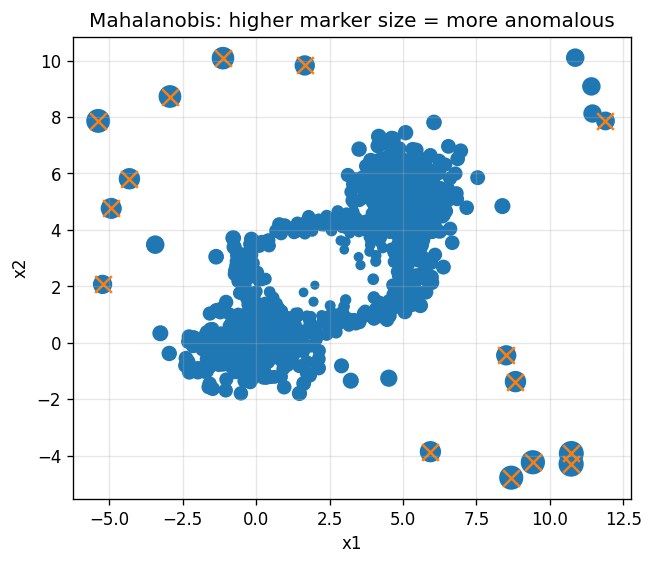

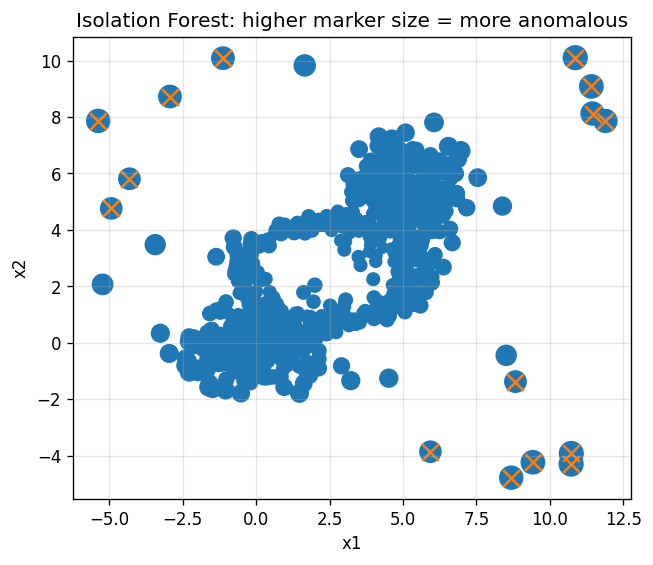

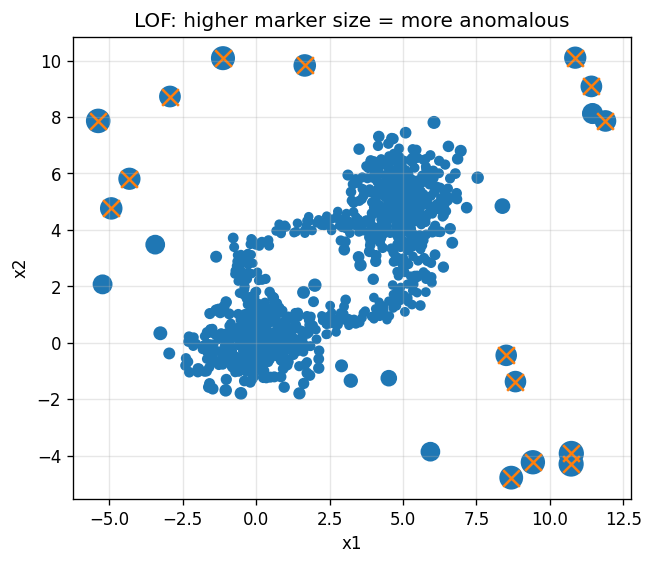

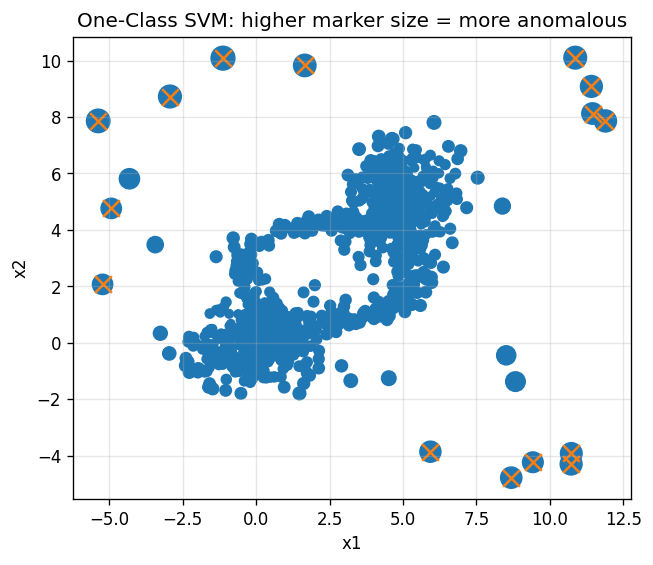

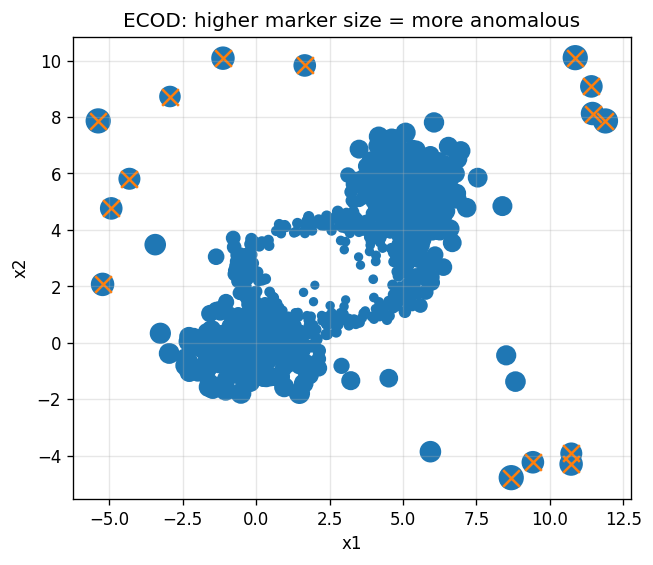

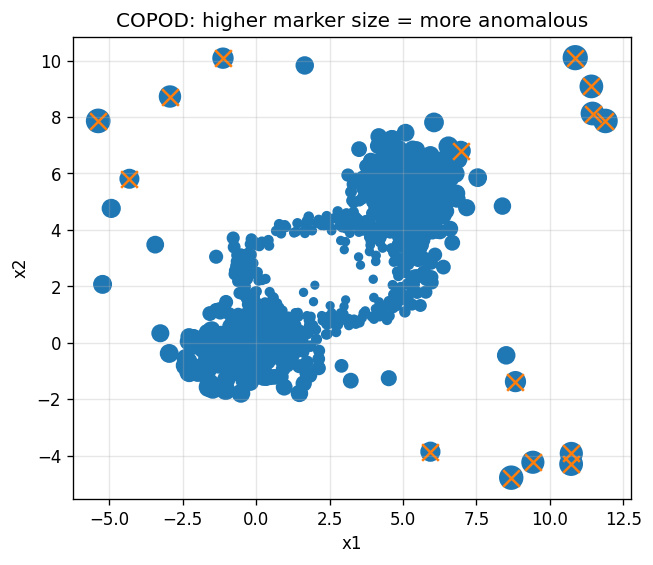

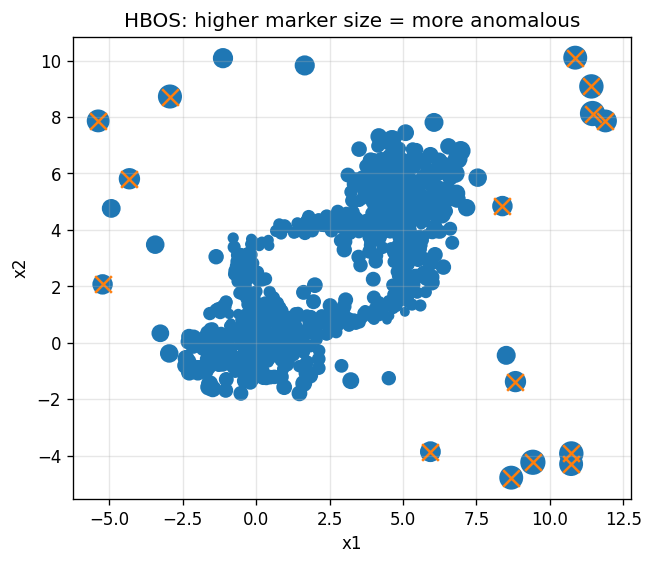

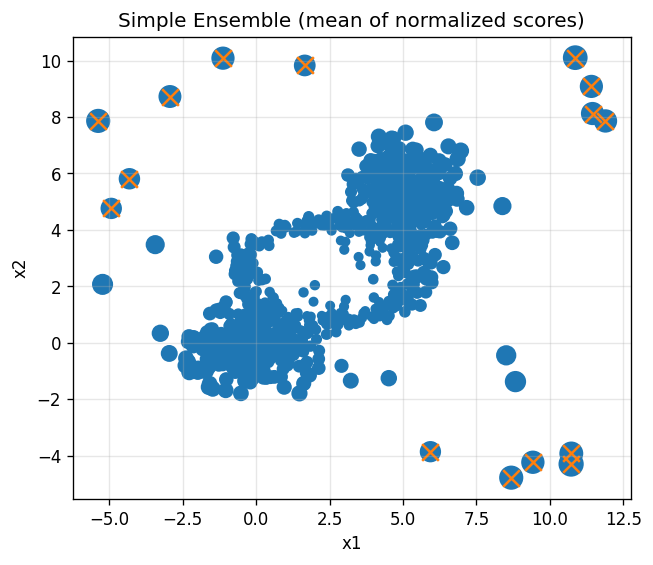

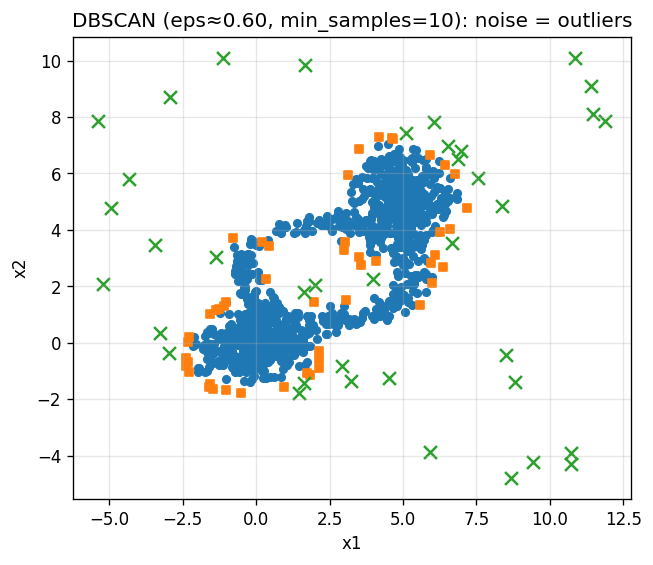

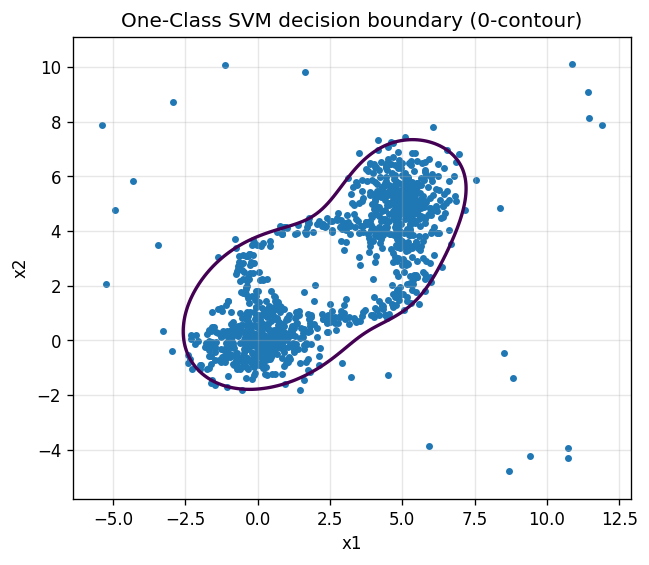

--- Top anomalies per method (indices refer to the synthetic dataset rows) ---
      method  rank  index     score          x          y
0    Z-Score     1   1052  1.000000  11.896845   7.861633
1    Z-Score     2   1068  0.950375  11.455888   8.124996
2    Z-Score     3   1069  0.945962  11.416674   9.086458
3    Z-Score     4   1079  0.884093  10.866926  10.105114
4    Z-Score     5   1073  0.868996  10.732781  -3.926651
..       ...   ...    ...       ...        ...        ...
139     HBOS     8   1051  0.880746  10.726360  -4.301853
140     HBOS     9   1052  0.788771  11.896845   7.861633
141     HBOS    10   1054  0.788771  -5.384771   7.863365
142     HBOS    11   1053  0.666124  -4.321124   5.812134
143     HBOS    12   1067  0.659642   8.830422  -1.379008

[144 rows x 6 columns]


In [3]:
# Outlier Detection Illustrations (Matplotlib-only, no seaborn)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.covariance import LedoitWolf
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

def display_dataframe_to_user(title, df):
    print(f"--- {title} ---")
    print(df)

# ---------- 1) Synthetic 2D dataset ----------
rng = np.random.default_rng(42)

# Two dense Gaussian clusters
n1, n2 = 400, 400
C1 = rng.normal(loc=[0.0, 0.0], scale=[1.0, 0.7], size=(n1, 2))
C2 = rng.normal(loc=[5.0, 5.0], scale=[0.8, 1.0], size=(n2, 2))

# Curved pattern (to challenge linear assumptions)
theta = rng.uniform(0, 2*np.pi, 250)
r = 3 + 0.3 * rng.normal(size=250)
C3 = np.c_[r*np.cos(theta)+2.5, 0.6*r*np.sin(theta)+2.5]

# Add explicit outliers
n_out = 30
O = rng.uniform(low=-6, high=12, size=(n_out, 2))

X = np.vstack([C1, C2, C3, O])
n = len(X)

# Utility: normalize scores to [0,1] (higher means more anomalous)
def norm01(a):
    a = np.asarray(a, float)
    amin, amax = np.nanmin(a), np.nanmax(a)
    if amax == amin:
        return np.zeros_like(a)
    return (a - amin) / (amax - amin)

# ---------- 2) Statistical: Z-score, Modified Z, IQR ----------
def zscore_score(X):
    mu = X.mean(axis=0)
    sd = X.std(axis=0, ddof=1) + 1e-12
    z = np.abs((X - mu) / sd)
    # Aggregate per-point (max across features = "any feature extreme")
    return z.max(axis=1)

def modified_z_score(X):
    med = np.median(X, axis=0)
    mad = np.median(np.abs(X - med), axis=0) + 1e-12
    mz = 0.6745 * np.abs(X - med) / mad
    return mz.max(axis=1)

def iqr_score(X):
    q1 = np.percentile(X, 25, axis=0)
    q3 = np.percentile(X, 75, axis=0)
    iqr = (q3 - q1) + 1e-12
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    below = np.maximum(lower - X, 0.0)
    above = np.maximum(X - upper, 0.0)
    out_excess = np.maximum(below, above)
    # sum across features = "how far beyond fences"
    return out_excess.sum(axis=1)

# ---------- 3) PCA Reconstruction Error ----------
def pca_recon_error(X, var_ratio=0.95):
    pca = PCA().fit(X)
    # choose k components to reach target variance ratio
    cum = np.cumsum(pca.explained_variance_ratio_)
    k = int(np.searchsorted(cum, var_ratio) + 1)
    pca = PCA(n_components=k).fit(X)
    Z = pca.transform(X)
    Xhat = pca.inverse_transform(Z)
    err = np.sum((X - Xhat)**2, axis=1)
    return err

# ---------- 4) Distance-based: KNN avg distance ----------
def knn_avg_distance(X, k=10):
    nbrs = NearestNeighbors(n_neighbors=min(k+1, len(X))).fit(X)
    dist, _ = nbrs.kneighbors(X)
    # skip self (distance 0), average of next k distances
    return dist[:, 1:].mean(axis=1)

# ---------- 5) Mahalanobis (with shrinkage covariance) ----------
def mahalanobis_score(X):
    lw = LedoitWolf().fit(X)
    mu = lw.location_
    cov_inv = lw.precision_
    diff = X - mu
    # d^2 = (x-mu)^T * cov_inv * (x-mu)
    d2 = np.einsum("ni,ij,nj->n", diff, cov_inv, diff)
    return np.sqrt(np.maximum(d2, 0.0))

# ---------- 6) Model-based: Isolation Forest, LOF, One-Class SVM ----------
def isolation_forest_score(X, contamination=0.03, n_estimators=200, random_state=42):
    iso = IsolationForest(
        n_estimators=n_estimators,
        contamination=contamination,
        random_state=random_state,
    ).fit(X)
    # higher anomaly score -> more normal in sklearn; invert
    s = -iso.score_samples(X)
    return s

def lof_score(X, n_neighbors=20):
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, novelty=False)
    y = lof.fit_predict(X)
    # negative_outlier_factor_: more negative => more outlier; invert sign
    s = -lof.negative_outlier_factor_
    return s

def ocsvm_score(X, nu=0.05, gamma="scale"):
    oc = OneClassSVM(nu=nu, gamma=gamma)
    oc.fit(X)
    # decision_function: positive -> inside; negative -> outlier; invert so higher => more anomalous
    s = -oc.decision_function(X).ravel()
    return s

# ---------- 7) Distribution-based: ECOD, COPOD, HBOS (lightweight implementations) ----------
def _empirical_cdf_scores(col):
    # rank-based CDF in [0,1], with average ranks for ties
    order = np.argsort(col)
    ranks = np.empty_like(order, dtype=float)
    ranks[order] = np.arange(1, len(col)+1)
    u = (ranks - 0.5) / len(col)  # mid-ranks
    return u

def ecod_score(X):
    U = np.column_stack([_empirical_cdf_scores(X[:, j]) for j in range(X.shape[1])])
    tau = np.minimum(U, 1 - U) + 1e-12  # tail proximity
    # outlier if extreme in ANY dimension -> use min tail prob
    min_tau = tau.min(axis=1)
    return -np.log(min_tau)

def copod_score(X):
    # independence copula surprise: product of marginal CDF tail probs
    U = np.column_stack([_empirical_cdf_scores(X[:, j]) for j in range(X.shape[1])])
    tails = np.minimum(U, 1 - U) + 1e-12
    # joint "surprise": sum of -log(tail) across features
    return -np.sum(np.log(tails), axis=1)

def hbos_score(X, bins=20):
    # per-feature hist density, independence assumption, sum -log p
    scores = np.zeros(len(X), float)
    for j in range(X.shape[1]):
        col = X[:, j]
        hist, edges = np.histogram(col, bins=bins, density=True)
        # avoid zeros
        hist = np.maximum(hist, 1e-12)
        # bin index for each x
        idx = np.clip(np.searchsorted(edges, col, side="right") - 1, 0, len(hist)-1)
        p = hist[idx]
        scores += -np.log(p)
    return scores

# ---------- 8) Run all methods ----------
methods = {
    "Z-Score": zscore_score(X),
    "Modified Z": modified_z_score(X),
    "IQR": iqr_score(X),
    "PCA Recon Error": pca_recon_error(X, var_ratio=0.95),
    "KNN Avg Dist": knn_avg_distance(X, k=12),
    "Mahalanobis": mahalanobis_score(X),
    "Isolation Forest": isolation_forest_score(X, contamination=0.03),
    "LOF": lof_score(X, n_neighbors=20),
    "One-Class SVM": ocsvm_score(X, nu=0.05, gamma="scale"),
    "ECOD": ecod_score(X),
    "COPOD": copod_score(X),
    "HBOS": hbos_score(X, bins=20),
}

# Normalize scores for visualization and assemble a summary
normed = {name: norm01(score) for name, score in methods.items()}
summary = pd.DataFrame({name: normed[name] for name in methods})
summary["mean_ensemble"] = summary.mean(axis=1)

# Top anomalies per method
top_k = 12
tops = []
for name, s in normed.items():
    idx = np.argsort(-s)[:top_k]
    for rank, i in enumerate(idx, 1):
        tops.append({"method": name, "rank": rank, "index": int(i), "score": float(s[i]), "x": float(X[i,0]), "y": float(X[i,1])})
tops_df = pd.DataFrame(tops)

# ---------- 9) Plot helpers ----------
def scatter_with_scores(ax, X, s_norm, title, top_n=15):
    ax.set_title(title)
    # size by score (scaled to a reasonable range)
    ms = 20 + 180 * s_norm
    ax.scatter(X[:, 0], X[:, 1], s=ms)
    # mark the top N as crosses
    idx = np.argsort(-s_norm)[:top_n]
    ax.scatter(X[idx, 0], X[idx, 1], marker="x", s=100)
    ax.grid(True, alpha=0.3)

# ---------- 10) Base data plot ----------
plt.figure(figsize=(6, 5), dpi=120)
plt.title("Synthetic Dataset (Clusters + Curved Structure + Outliers)")
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.grid(True, alpha=0.3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# ---------- 11) Individual method plots (one chart per method) ----------
for name in methods:
    fig = plt.figure(figsize=(6, 5), dpi=120)
    ax = fig.add_subplot(111)
    scatter_with_scores(ax, X, normed[name], f"{name}: higher marker size = more anomalous")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    plt.show()

# ---------- 12) Ensemble plot ----------
plt.figure(figsize=(6, 5), dpi=120)
plt.title("Simple Ensemble (mean of normalized scores)")
ms = 20 + 180 * norm01(summary["mean_ensemble"].values)
plt.scatter(X[:, 0], X[:, 1], s=ms)
idx = np.argsort(-summary["mean_ensemble"].values)[:15]
plt.scatter(X[idx, 0], X[idx, 1], marker="x", s=100)
plt.grid(True, alpha=0.3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# ---------- 13) DBSCAN illustration (core/border/noise) ----------
from sklearn.cluster import DBSCAN

# Heuristic eps via 10th neighbor distance elbow-ish (use quantile)
nbrs = NearestNeighbors(n_neighbors=10).fit(X)
dists, _ = nbrs.kneighbors(X)
kdist = np.sort(dists[:, -1])
eps = float(np.quantile(kdist, 0.92))

db = DBSCAN(eps=eps, min_samples=10).fit(X)
labels = db.labels_  # -1 means noise
core_mask = np.zeros_like(labels, dtype=bool)
core_mask[db.core_sample_indices_] = True

plt.figure(figsize=(6, 5), dpi=120)
plt.title(f"DBSCAN (eps≈{eps:.2f}, min_samples=10): noise = outliers")
# core
plt.scatter(X[core_mask & (labels!=-1), 0], X[core_mask & (labels!=-1), 1], s=20)
# border
plt.scatter(X[~core_mask & (labels!=-1), 0], X[~core_mask & (labels!=-1), 1], s=20, marker="s")
# noise (outliers)
plt.scatter(X[labels==-1, 0], X[labels==-1, 1], s=60, marker="x")
plt.grid(True, alpha=0.3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# ---------- 14) One-Class SVM boundary visualization ----------
# Grid for decision function
gx, gy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200),
)
grid = np.c_[gx.ravel(), gy.ravel()]
oc = OneClassSVM(nu=0.05, gamma="scale").fit(X)
Z = oc.decision_function(grid).reshape(gx.shape)

plt.figure(figsize=(6, 5), dpi=120)
plt.title("One-Class SVM decision boundary (0-contour)")
plt.contour(gx, gy, Z, levels=[0], linewidths=2)
plt.scatter(X[:,0], X[:,1], s=10)
plt.grid(True, alpha=0.3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# ---------- 15) Show top anomalies table ----------
display_dataframe_to_user("Top anomalies per method (indices refer to the synthetic dataset rows)", tops_df)